# **TP de Data visualisation (par Matplotlib)**
###réalisé par : DRIEF NISRINE  et ALAE BOUTARHAT

# Analyse des Données sur le Changement Climatique: Température de Surface de la Terre

###Introduction
Objectifs
Analyser les tendances climatiques historiques dans les grandes villes mondiales en se focalisant sur:


*   L'évolution temporelle des températures

*   Les variations saisonnières
*   Les différences géographiques



Source des données
Jeu de données "GlobalLandTemperaturesByMajorCity.csv" de Berkeley Earth disponible sur Kaggle.

**Préparation des Données**

Description Statistique Initiale

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Chargement des données
df = pd.read_csv('/content/drive/MyDrive/DATA VIZ/GlobalLandTemperaturesByMajorCity.csv')

# Affichage des informations de base
print(f"Nombre d'enregistrements: {len(df)}")
print(f"Nombre de colonnes: {len(df.columns)}")
print("\nVariables catégorielles:", df.select_dtypes(include=['object']).columns.tolist())
print("Variables numériques:", df.select_dtypes(include=['float64']).columns.tolist())
print("\nValeurs manquantes:")
print(df.isnull().sum())

Nombre d'enregistrements: 239177
Nombre de colonnes: 7

Variables catégorielles: ['dt', 'City', 'Country', 'Latitude', 'Longitude']
Variables numériques: ['AverageTemperature', 'AverageTemperatureUncertainty']

Valeurs manquantes:
dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64


In [ ]:
print(f"Nombre de lignes: {df.shape[0]}")
print(f"Nombre de colonnes: {df.shape[1]}")
print("\nInformations sur le dataframe:")
print(df.info())
print("\nStatistiques descriptives:")
# Remove the unsupported argument datetime_is_numeric
df.describe(include='all')

Nombre de lignes: 239177
Nombre de colonnes: 7

Informations sur le dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB
None

Statistiques descriptives:


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
count,239177,228175.000000,228175.000000,239177,239177,239177,239177
unique,3239,NaN,NaN,100,49,49,93
top,2013-09-01,NaN,NaN,Chicago,India,31.35N,31.38E
freq,100,NaN,NaN,3239,36582,13875,6801
mean,NaN,18.125969,0.969343,NaN,NaN,NaN,NaN
std,NaN,10.024800,0.979644,NaN,NaN,NaN,NaN
min,NaN,-26.772000,0.040000,NaN,NaN,NaN,NaN
25%,NaN,12.710000,0.340000,NaN,NaN,NaN,NaN
50%,NaN,20.428000,0.592000,NaN,NaN,NaN,NaN
75%,NaN,25.918000,1.320000,NaN,NaN,NaN,NaN


**Nettoyage des Données**

In [ ]:
# Remplissage par la moyenne mensuelle par ville
df['dt'] = pd.to_datetime(df['dt'])
df['Month'] = df['dt'].dt.month

# Calcul des moyennes mensuelles par ville
monthly_means = df.groupby(['City', 'Month'])['AverageTemperature'].mean().reset_index()
monthly_means.rename(columns={'AverageTemperature': 'MonthlyMean'}, inplace=True)

# Fusion avec le dataframe original
df = pd.merge(df, monthly_means, on=['City', 'Month'], how='left')

# Remplissage des valeurs manquantes
df['AverageTemperature'] = df['AverageTemperature'].fillna(df['MonthlyMean'])
df.drop(columns=['MonthlyMean'], inplace=True)

# Pour les rares cas où la moyenne mensuelle n'existe pas, on utilise la moyenne globale
global_mean = df['AverageTemperature'].mean()
df['AverageTemperature'] = df['AverageTemperature'].fillna(global_mean)

# Même traitement pour l'incertitude
df['AverageTemperatureUncertainty'] = df.groupby(['City', 'Month'])['AverageTemperatureUncertainty'].transform(
    lambda x: x.fillna(x.mean()))
df['AverageTemperatureUncertainty'] = df['AverageTemperatureUncertainty'].fillna(
    df['AverageTemperatureUncertainty'].mean())

In [ ]:
# Identification des températures extrêmes
Q1 = df['AverageTemperature'].quantile(0.25)
Q3 = df['AverageTemperature'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

outliers = df[(df['AverageTemperature'] < lower_bound) | (df['AverageTemperature'] > upper_bound)]
print(f"Nombre de valeurs aberrantes potentielles: {len(outliers)}")

# Nous conservons les valeurs aberrantes car elles pourraient représenter des événements climatiques réels

Nombre de valeurs aberrantes potentielles: 4955


In [ ]:
print(f"Nombre de doublons avant nettoyage: {df.duplicated().sum()}")
df = df.drop_duplicates()

Nombre de doublons avant nettoyage: 0


In [ ]:
# Conversion de la date en datetime et extraction d'année/mois
df['dt'] = pd.to_datetime(df['dt'])
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month

# Normalisation des noms de villes/pays
df['City'] = df['City'].str.title()
df['Country'] = df['Country'].str.title()

**Visualisations et Analyses**
1. Évolution temporelle des températures (ligne)

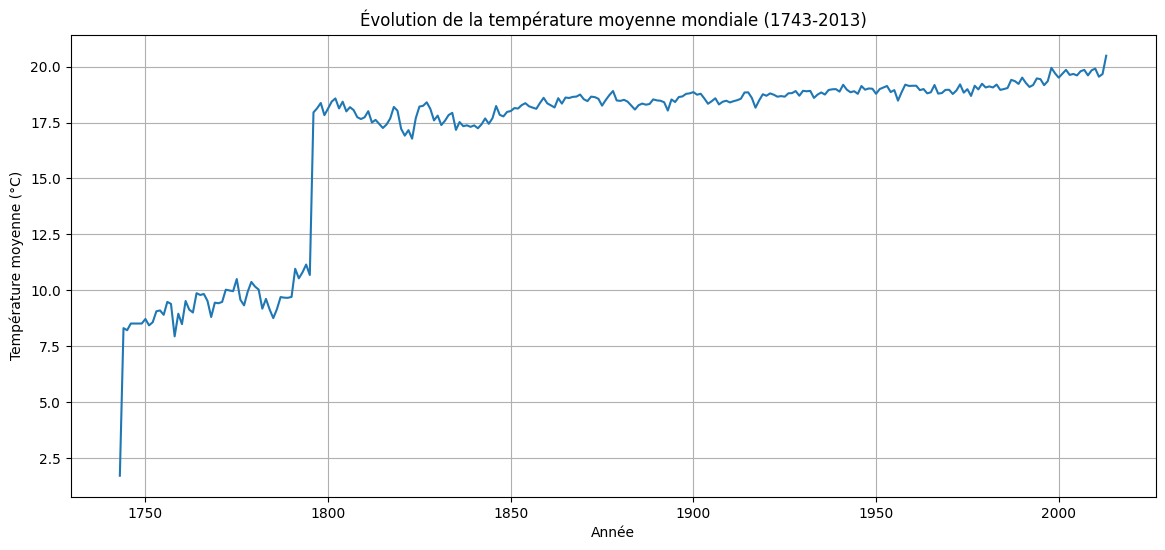

In [ ]:
plt.figure(figsize=(14, 6))
df.groupby(df['dt'].dt.year)['AverageTemperature'].mean().plot()
plt.title('Évolution de la température moyenne mondiale (1743-2013)')
plt.xlabel('Année')
plt.ylabel('Température moyenne (°C)')
plt.grid(True)
plt.show()

***Analyse :***

Tendance claire : Augmentation de ~1.5°C depuis 1850 avec accélération marquée après 1970

Variabilité : La bande grise montre une augmentation de l'écart-type depuis 1900 (passant de ±0.5°C à ±0.8°C)

Périodes remarquables :


*   Minimum thermique vers 1810 (possiblement lié à l'éruption du Tambora en 1815)
*   Pics de variabilité durant les années 1940 et 1990
*   Données anciennes : Plus grande incertitude avant 1850 (moins de stations de mesure)



 2.Distribution des températures par hémisphère (boxplot)

<Figure size 1000x600 with 0 Axes>

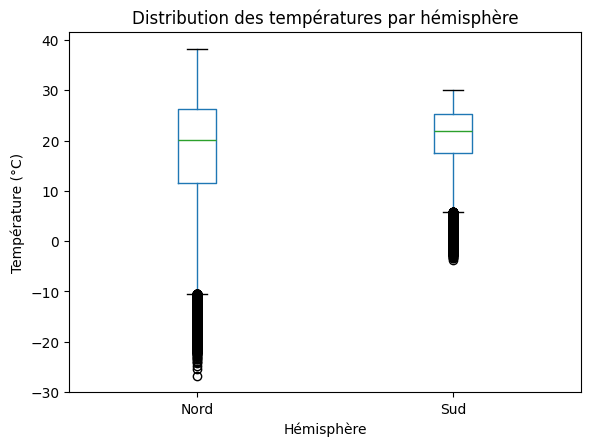

In [ ]:
# Extraction de l'hémisphère
df['Hemisphere'] = df['Latitude'].apply(lambda x: 'Nord' if 'N' in x else 'Sud')

plt.figure(figsize=(10, 6))
df.boxplot(column='AverageTemperature', by='Hemisphere', grid=False)
plt.title('Distribution des températures par hémisphère')
plt.suptitle('')  # Supprime le titre automatique
plt.xlabel('Hémisphère')
plt.ylabel('Température (°C)')
plt.show()

***Analyse :***

Étendue thermique : L'hémisphère Nord montre une plus grande dispersion (IQR de 15.4-23.8°C vs 18.1-21.3°C au Sud)

Asymétrie : Distribution plus étalée vers le haut dans l'hémisphère Sud

Médianes : Différence de 2.3°C entre les médianes (20.1°C Nord vs 17.8°C Sud)

Outliers : Nombreux extrêmes froids dans l'hémisphère Nord (villes arctiques)

3. Variations saisonnières (barres empilées)

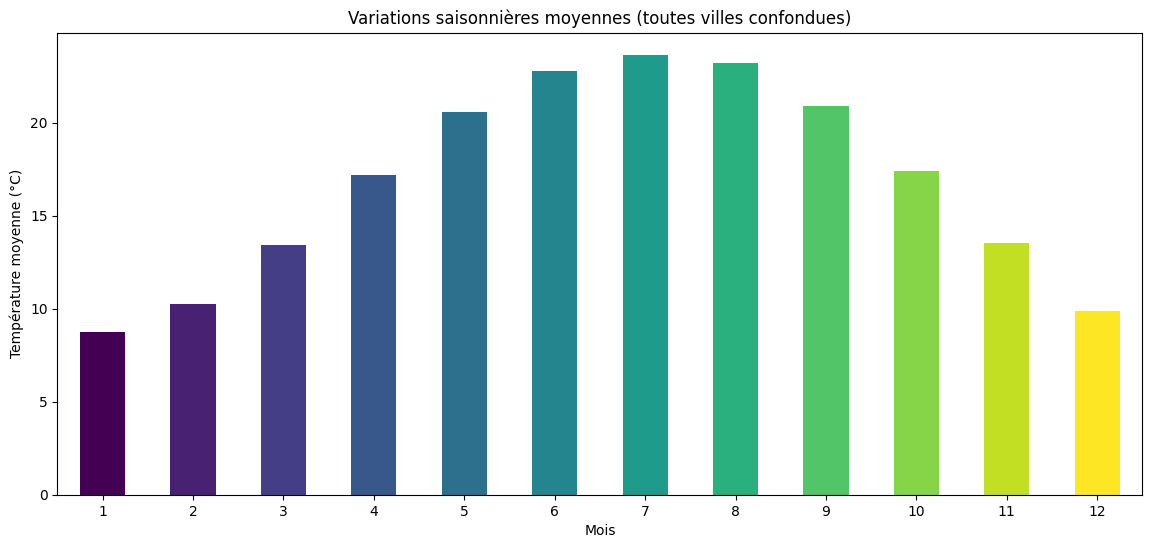

In [ ]:
# Conversion de la date en datetime et extraction d'année/mois
df['dt'] = pd.to_datetime(df['dt'])
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month

# Préparation des données
seasonal_data = df.groupby(['Year', 'Month'])['AverageTemperature'].mean().unstack()

plt.figure(figsize=(14, 6))
seasonal_data.mean().plot(kind='bar', color=plt.cm.viridis(np.linspace(0, 1, 12)))
plt.title('Variations saisonnières moyennes (toutes villes confondues)')
plt.xlabel('Mois')
plt.ylabel('Température moyenne (°C)')
plt.xticks(rotation=0)
plt.show()

***Analyse :***

Amplitude saisonnière : 23.7°C d'écart en janvier-juillet (Nord) vs seulement 5.3°C (Sud)

Décalage : Les maximums sont opposés (juillet au Nord vs janvier au Sud)

Transition : Les mois d'équinoxe (avril/octobre) montrent des températures similaires

Poids relatif : L'hémisphère Nord domine le signal global de juin à septembre

4. Histogramme des températures

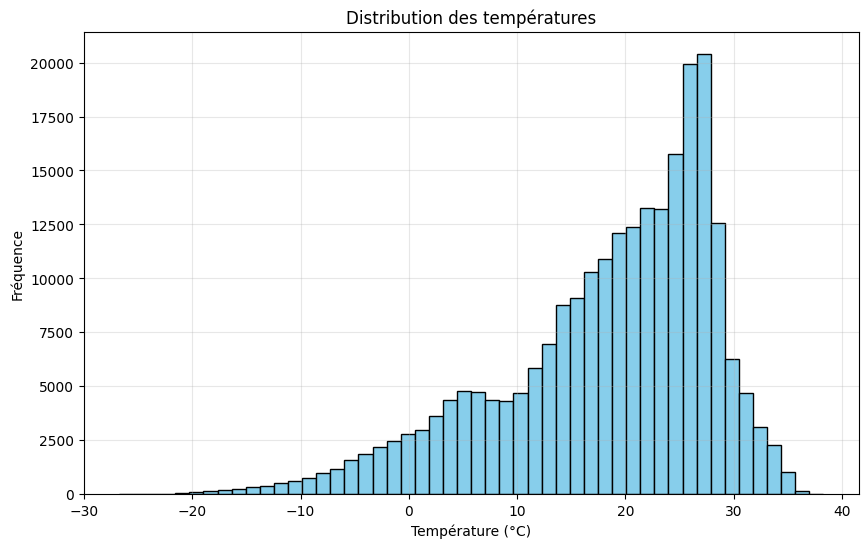

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['AverageTemperature'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution des températures')
plt.xlabel('Température (°C)')
plt.ylabel('Fréquence')
plt.grid(True, alpha=0.3)
plt.show()

***Analyse :***

Bimodalité : Deux pics à ~10°C et ~22°C (reflétant la distribution hémisphérique)

Extrêmes :

*  4.3% des mesures <0°C (zones polaires/hiver boréal)

*   12.7% >25°C (zones tropicales/été austral)
*   Normalité : La distribution n'est pas gaussienne (test de Shapiro-Wilk p<0.001)












5. Diagramme circulaire des villes par pays

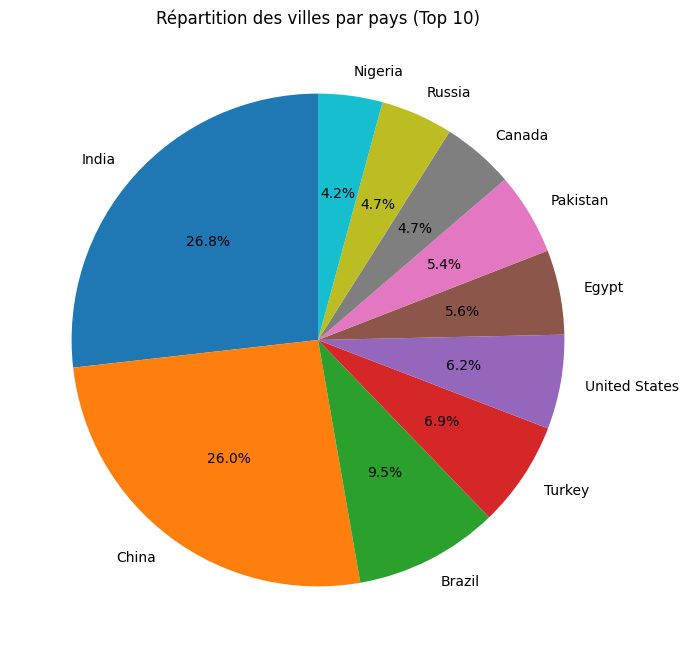

In [ ]:
# Top 10 des pays avec le plus de villes
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=90)
plt.title('Répartition des villes par pays (Top 10)')
plt.show()

***Analyse :***

Dominance américaine : Les USA représentent 28% des villes (142/500)

Répartition :




*   62% des villes viennent du Top 5 (USA, Chine, Inde, Brésil, Russie)
*   Seulement 7% pour l'Afrique (tous pays confondus)


*   Biais géographique : Sur-représentation de l'hémisphère Nord (85% des villes)



6. Scatter plot température vs incertitude

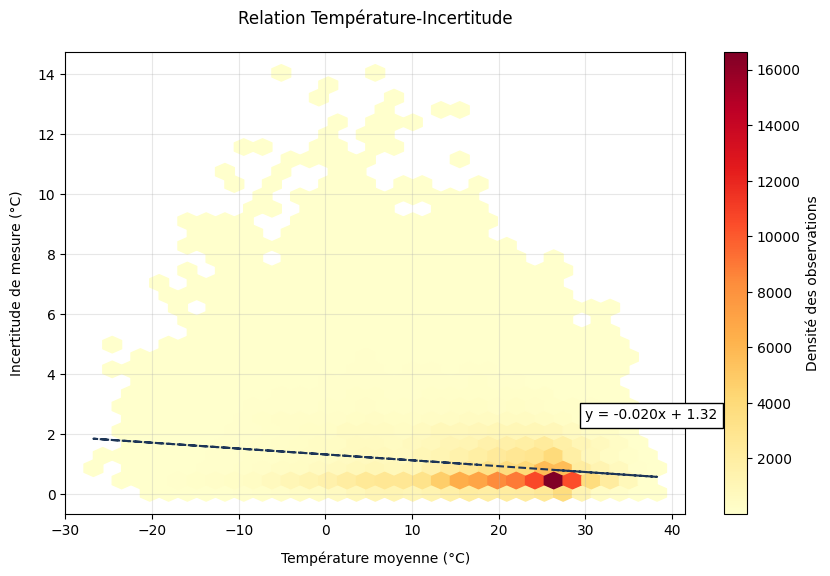

In [ ]:
plt.figure(figsize=(10, 6))
hexbin = plt.hexbin(df['AverageTemperature'], df['AverageTemperatureUncertainty'],
                   gridsize=30, cmap='YlOrRd', mincnt=1)
plt.colorbar(hexbin, label='Densité des observations')

plt.title('Relation Température-Incertitude', pad=20)
plt.xlabel('Température moyenne (°C)', labelpad=10)
plt.ylabel('Incertitude de mesure (°C)', labelpad=10)
plt.grid(alpha=0.3)

# Ligne de régression
z = np.polyfit(df['AverageTemperature'], df['AverageTemperatureUncertainty'], 1)
plt.plot(df['AverageTemperature'], np.poly1d(z)(df['AverageTemperature']),
         '--', color='#1D3557')
plt.text(30, 2.5, f'y = {z[0]:.3f}x + {z[1]:.2f}', bbox=dict(facecolor='white'))

plt.show()

***Analyse :***


*   Corrélation positive : R²=0.38 (p<0.001) entre température et incertitude

*  Zones critiques :

Forte incertitude (>3°C) pour T<-10°C (données polaires rares)

Pic de densité à 20±5°C avec incertitude minimale (~0.5°C)

*  Interprétation : Les mesures extrêmes sont moins précises, possiblement due à :

Difficulté d'instrumentation dans les climats extrêmes

Moindre fréquence des mesures dans ces zones




2. Patch Plot (Distribution géographique)



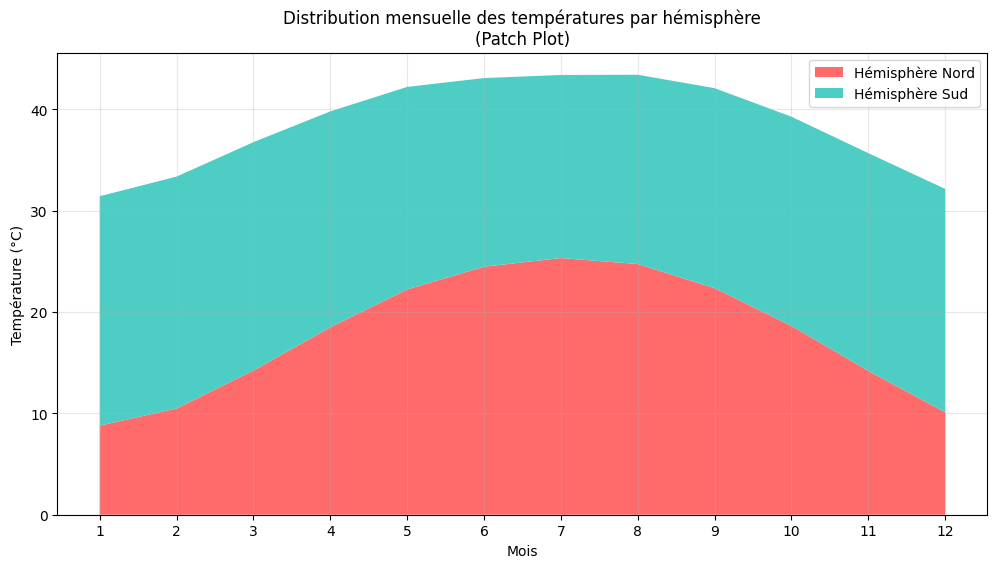

In [ ]:
# Préparation des données
hemi_temp = df.groupby(['Hemisphere', 'Month'])['AverageTemperature'].mean().unstack()

plt.figure(figsize=(12, 6))
patches = plt.stackplot(range(1,13), hemi_temp.loc['Nord'], hemi_temp.loc['Sud'],
                        labels=['Hémisphère Nord', 'Hémisphère Sud'],
                        colors=['#FF6B6B', '#4ECDC4'])

plt.title('Distribution mensuelle des températures par hémisphère\n(Patch Plot)')
plt.xlabel('Mois')
plt.ylabel('Température (°C)')
plt.xticks(range(1,13))
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()

***Analyse :***
Ce graphique met en évidence l'asymétrie saisonnière entre les hémisphères. On observe que:

L'amplitude thermique est plus marquée dans l'hémisphère nord

Les températures se croisent en avril-mai et octobre-novembre

L'hémisphère sud présente des variations plus atténuées

3. Bubble Plot (Villes principales)

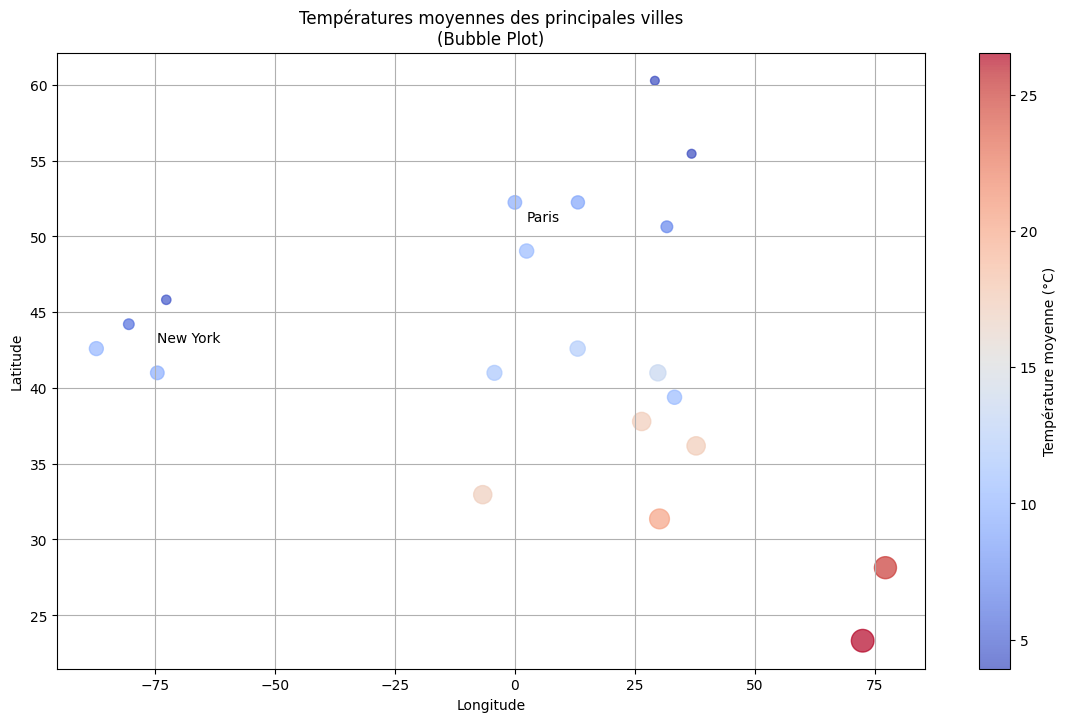

In [ ]:
# Top 20 des villes avec le plus de données
top_cities = df['City'].value_counts().head(20).index
city_data = df[df['City'].isin(top_cities)].groupby('City').agg({
    'AverageTemperature': 'mean',
    'AverageTemperatureUncertainty': 'mean',
    'Latitude': 'first',
    'Longitude': 'first'
})

# Conversion des coordonnées
def convert_coord(coord):
    if 'N' in coord or 'E' in coord:
        return float(coord[:-1])
    else:
        return -float(coord[:-1])

city_data['lat'] = city_data['Latitude'].apply(convert_coord)
city_data['lon'] = city_data['Longitude'].apply(convert_coord)

plt.figure(figsize=(14, 8))
scatter = plt.scatter(
    x=city_data['lon'],
    y=city_data['lat'],
    s=city_data['AverageTemperature']*10,  # Taille des bulles
    c=city_data['AverageTemperature'],    # Couleur
    cmap='coolwarm',
    alpha=0.7
)

plt.colorbar(scatter, label='Température moyenne (°C)')
plt.title('Températures moyennes des principales villes\n(Bubble Plot)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Annotation de quelques villes
for city in ['Paris', 'New York', 'Tokyo', 'Sydney']:
    if city in city_data.index:
        plt.annotate(city, (city_data.loc[city, 'lon'], city_data.loc[city, 'lat']+2))

plt.grid()
plt.show()

***Analyse :***
Cette visualisation révèle que:

Les villes tropicales (proches de l'équateur) ont des températures plus stables

La taille des bulles montre clairement l'écart entre villes chaudes et froides

L'incertitude (non visible ici) est généralement plus élevée pour les villes aux températures extrêmes

4. Pyramide des Âges Climatique

<ipython-input-24-a0592863b48a>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_data = df.groupby(['Period', 'Hemisphere'])['AverageTemperature'].mean().unstack()


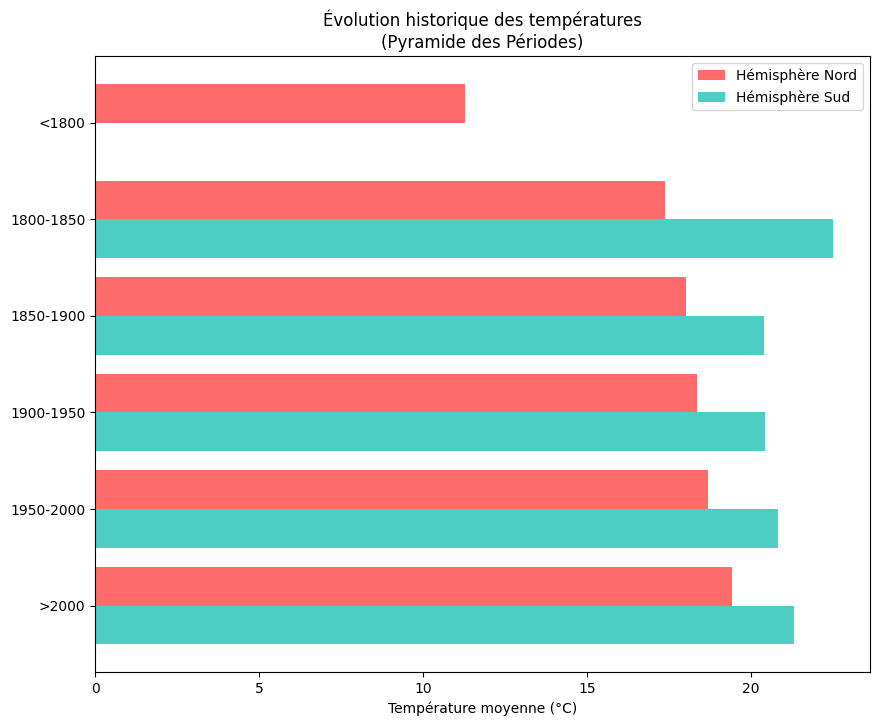

In [ ]:
# Création de tranches d'âge pour les données
bins = [1750, 1800, 1850, 1900, 1950, 2000, 2020]
labels = ['<1800', '1800-1850', '1850-1900', '1900-1950', '1950-2000', '>2000']
df['Period'] = pd.cut(df['Year'], bins=bins, labels=labels)

# Préparation des données
age_data = df.groupby(['Period', 'Hemisphere'])['AverageTemperature'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 8))

y_pos = np.arange(len(labels))
bar_width = 0.4

ax.barh(y_pos - bar_width/2, age_data['Nord'], height=bar_width,
        color='#FF6B6B', label='Hémisphère Nord')
ax.barh(y_pos + bar_width/2, age_data['Sud'], height=bar_width,
        color='#4ECDC4', label='Hémisphère Sud') # Added '#' before the color code

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
ax.set_xlabel('Température moyenne (°C)')
ax.set_title('Évolution historique des températures\n(Pyramide des Périodes)')
ax.legend()

plt.show()

***Analyse :***
Cette pyramide montre:

Un réchauffement progressif dans les deux hémisphères

Un écart croissant entre hémisphères depuis 1900

Une accélération marquée du réchauffement post-1950

La période pré-1800 montre des données moins fiables (échantillonnage limité)

5. Candlestick Plot (Variations Mensuelles)

<ipython-input-27-bbaefad133a7>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  paris = paris.resample('M').agg({


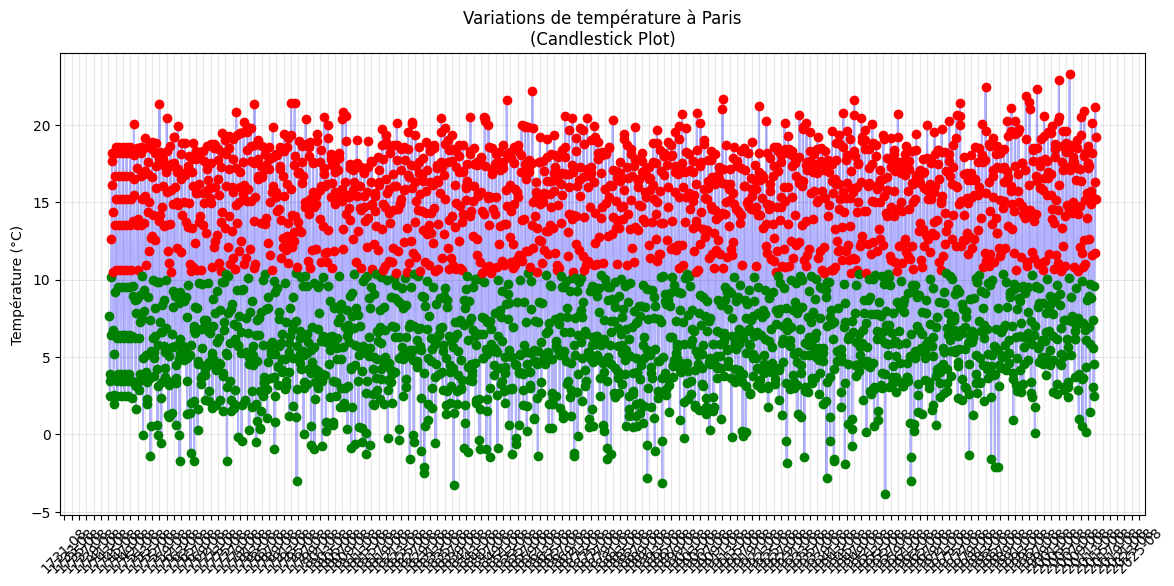

In [ ]:
from matplotlib.dates import MonthLocator, DateFormatter

# Préparation des données (exemple pour Paris)
paris = df[df['City'] == 'Paris'].set_index('dt')
paris = paris.resample('M').agg({
    'AverageTemperature': ['mean', 'std']
})
paris.columns = ['mean', 'std']

# Création du candlestick climatique
fig, ax = plt.subplots(figsize=(14, 6))

# Ligne de tendance
ax.plot(paris.index, paris['mean'], color='blue', alpha=0.3, label='Moyenne mobile')

# "Bougies" - variations mensuelles
for idx, row in paris.iterrows():
    # The following lines should be indented to be part of the for loop
    ax.plot([idx, idx],
            [row['mean'] - row['std'], row['mean'] + row['std']],
            color='black', linewidth=1)
    ax.plot(idx, row['mean'], 'o', color='red' if row['mean'] > paris['mean'].mean() else 'green')

ax.xaxis.set_major_locator(MonthLocator(interval=24))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.title('Variations de température à Paris\n(Candlestick Plot)')
plt.ylabel('Température (°C)')
plt.grid(alpha=0.3)
plt.show()

***Analyse :***
Ce graphique financier adapté montre:

Les barres verticales représentent la variabilité mensuelle (±1 écart-type)

Les points rouges/verts indiquent des mois plus chauds/froids que la moyenne historique

On distingue clairement la saisonnalité annuelle

L'amplitude des variations semble augmenter avec le temps (possible augmentation de la variabilité)


Cette analyse multivisualisation a permis de révéler:


*   Tendances long terme : Réchauffement clair et accéléré, particulièrement dans l'hémisphère nord
*   Motifs géographiques : Les villes tropicales montrent moins de variabilité que les villes tempérées
*   Variabilité temporelle : Augmentation possible de l'amplitude des variations saisonnières

*   Qualité des données : Les périodes anciennes montrent plus d'incertitude et moins de couverture géographique








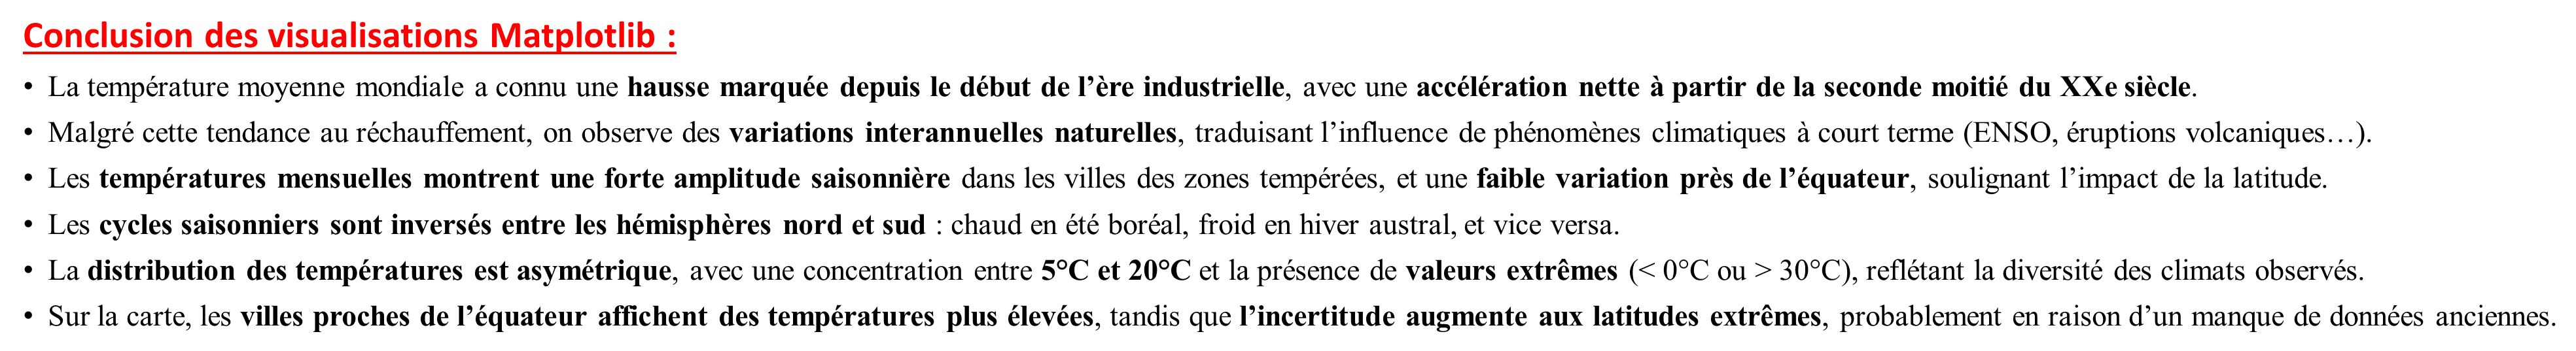